In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib notebook

In [2]:
import numpy as np

from BZI.symmetry import find_orbitals, make_ptvecs, HermiteNormalForm, Lattice
from BZI.sampling import make_cell_points, make_grid
from BZI.plots import PlotMesh

# Test

In [7]:
lat_centering = "prim"
lat_consts = [1.2]*3
lat_angles = [np.pi/2]*3
lat_vecs = make_ptvecs(lat_centering, lat_consts, lat_angles)

grid_centering = "prim"
grid_consts = [.4, .4, .4]
grid_angles = [np.pi/2]*3
grid_vecs = make_ptvecs(grid_centering, grid_consts, grid_angles)
offset = np.array([.5]*3)

grid = make_cell_points(lat_vecs, grid_vecs, offset)

<IPython.core.display.Javascript object>


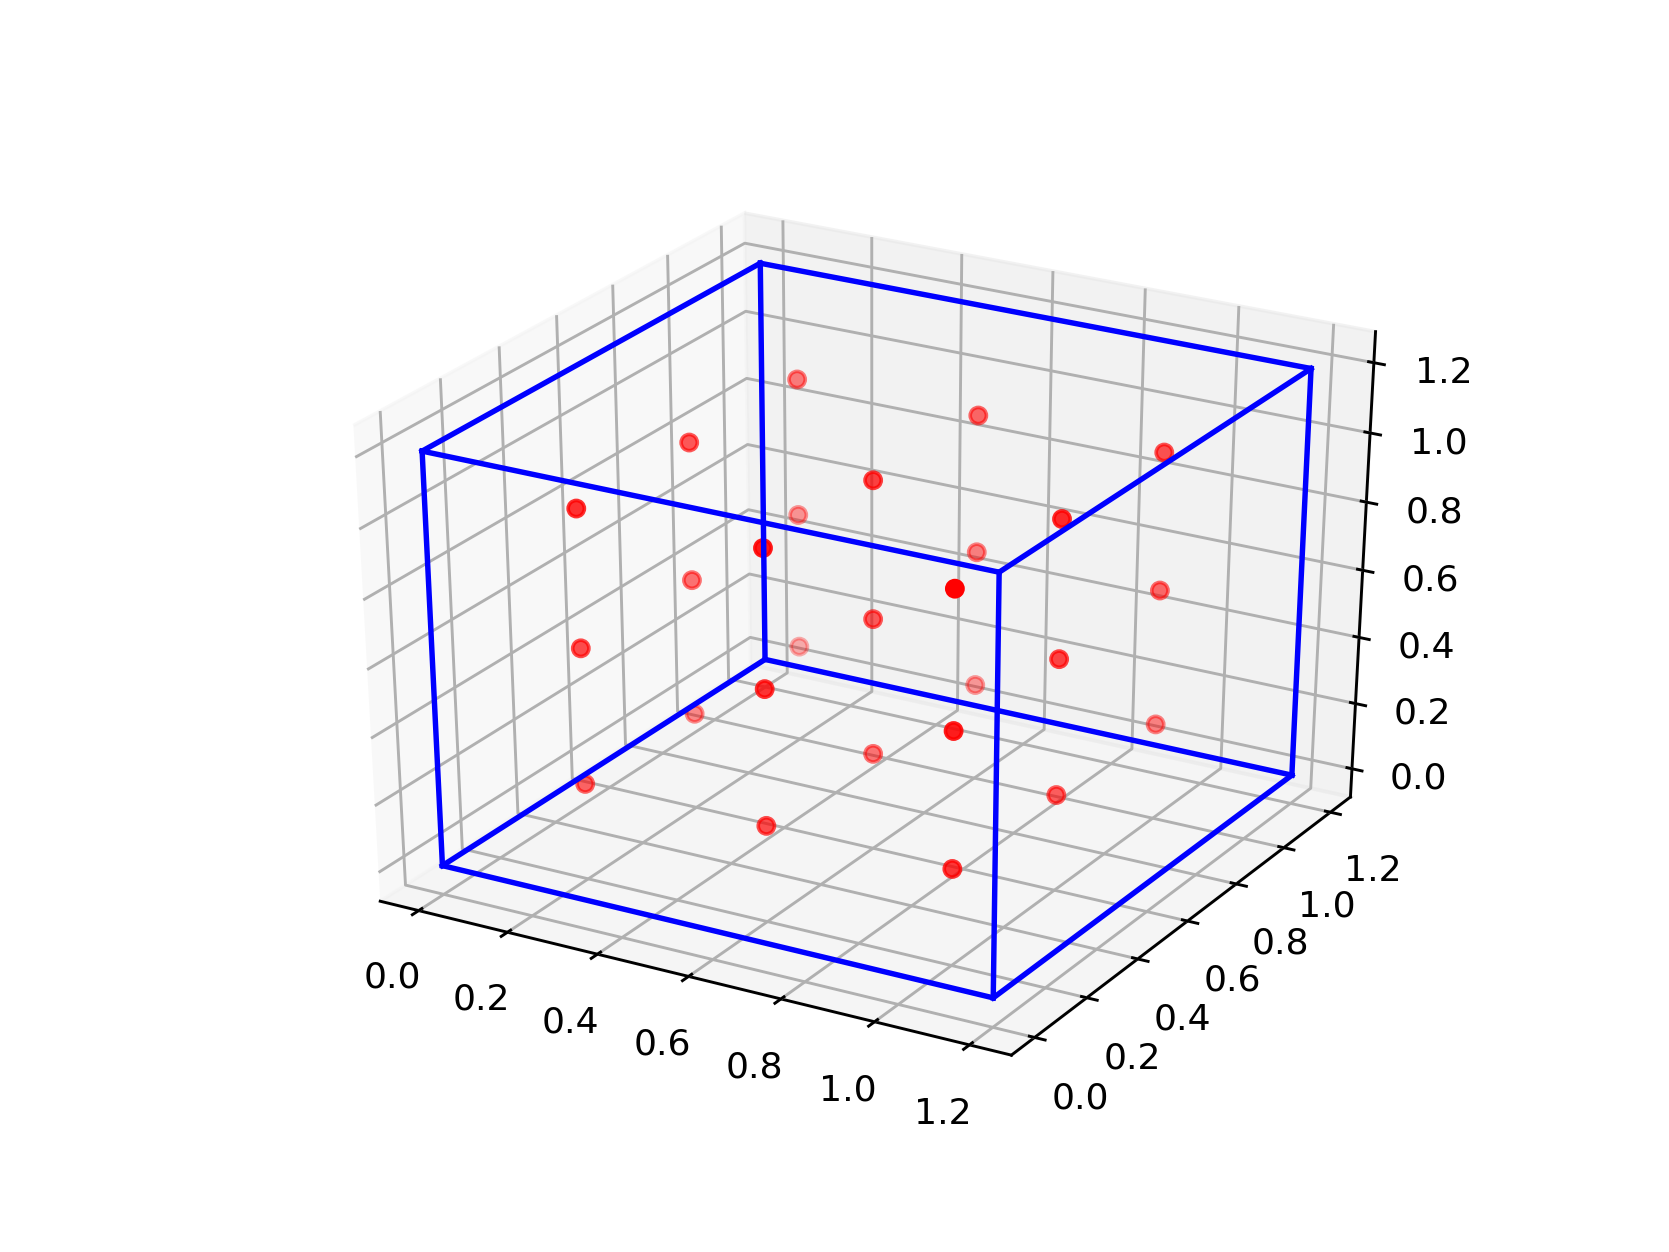

In [8]:
PlotMesh(grid, lat_vecs)

In [12]:
grid

[array([ 0.2,  0.2,  0.2]),
 array([ 0.2,  0.2,  0.6]),
 array([ 0.2,  0.2,  1. ]),
 array([ 0.2,  0.6,  0.2]),
 array([ 0.2,  0.6,  0.6]),
 array([ 0.2,  0.6,  1. ]),
 array([ 0.2,  1. ,  0.2]),
 array([ 0.2,  1. ,  0.6]),
 array([ 0.2,  1. ,  1. ]),
 array([ 0.6,  0.2,  0.2]),
 array([ 0.6,  0.2,  0.6]),
 array([ 0.6,  0.2,  1. ]),
 array([ 0.6,  0.6,  0.2]),
 array([ 0.6,  0.6,  0.6]),
 array([ 0.6,  0.6,  1. ]),
 array([ 0.6,  1. ,  0.2]),
 array([ 0.6,  1. ,  0.6]),
 array([ 0.6,  1. ,  1. ]),
 array([ 1. ,  0.2,  0.2]),
 array([ 1. ,  0.2,  0.6]),
 array([ 1. ,  0.2,  1. ]),
 array([ 1. ,  0.6,  0.2]),
 array([ 1. ,  0.6,  0.6]),
 array([ 1. ,  0.6,  1. ]),
 array([ 1. ,  1. ,  0.2]),
 array([ 1. ,  1. ,  0.6]),
 array([ 1.,  1.,  1.])]

In [10]:
find_orbitals(grid, lat_vecs)

{1: [array([ 1.,  1.,  1.]),
  array([ 0.2,  0.2,  0.2]),
  array([ 0.2,  0.2,  1. ]),
  array([ 0.2,  1. ,  0.2]),
  array([ 0.2,  1. ,  1. ]),
  array([ 1. ,  0.2,  0.2]),
  array([ 1. ,  0.2,  1. ]),
  array([ 1. ,  1. ,  0.2])],
 2: [array([ 1. ,  1. ,  0.6]),
  array([ 0.2,  0.2,  0.6]),
  array([ 0.2,  0.6,  0.2]),
  array([ 0.2,  0.6,  1. ]),
  array([ 0.2,  1. ,  0.6]),
  array([ 0.6,  0.2,  0.2]),
  array([ 0.6,  0.2,  1. ]),
  array([ 0.6,  1. ,  0.2]),
  array([ 0.6,  1. ,  1. ]),
  array([ 1. ,  0.2,  0.6]),
  array([ 1. ,  0.6,  0.2]),
  array([ 1. ,  0.6,  1. ])],
 3: [array([ 1. ,  0.6,  0.6]),
  array([ 0.2,  0.6,  0.6]),
  array([ 0.6,  0.2,  0.6]),
  array([ 0.6,  0.6,  0.2]),
  array([ 0.6,  0.6,  1. ]),
  array([ 0.6,  1. ,  0.6])],
 4: [array([ 0.6,  0.6,  0.6])]}